# Ordinal partition graph

Ordinal patterns methods are based on the idea of a set of sequential patterns defined for a sequence of consecutive observations, where each node of the network represents one of the defined patterns and the edges are weighted according to the transition frequency between two consecutive patterns.

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

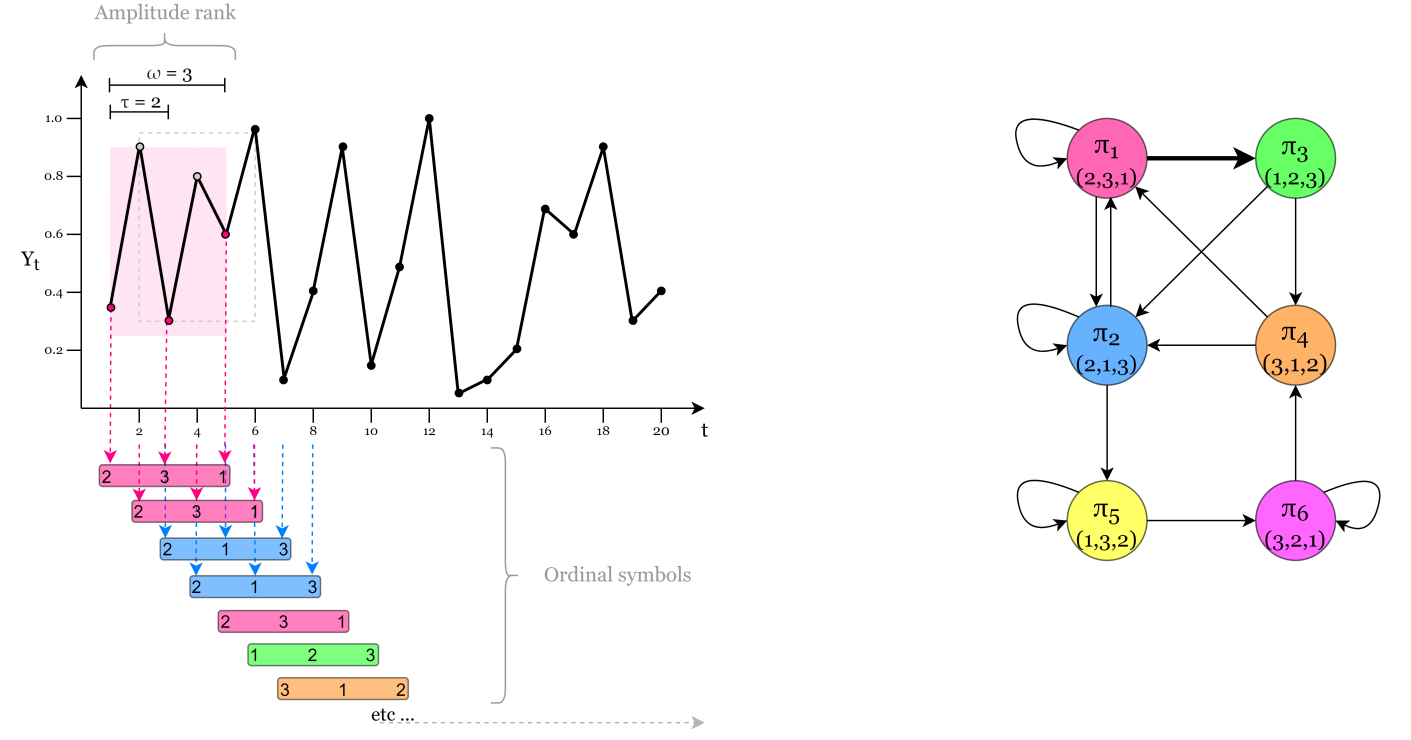

Illustrative example of ordinal partition transition network algorithm. On the left side we illustrate the method of embedding with window size w = 3 and lag τ = 2 and the method of find its ordinal pattern, based in the amplitude rank of its elements. On the right side we show the resulting networks.

Here is an example of ordinal partition graph made with our library:

In [4]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_to_graph import BuildTimeseriesToGraphOrdinalPartition
from to_graph.strategy_linking_multi_graphs import LinkGraphs

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

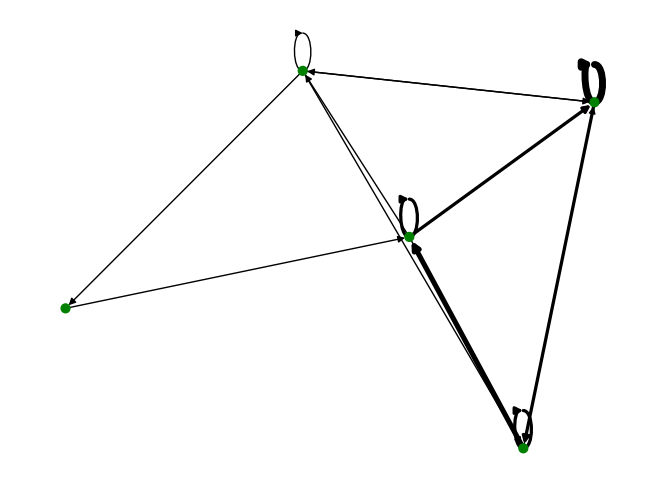

In [5]:
timegraph_ordinal_partition = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .to_graph(BuildTimeseriesToGraphOrdinalPartition(3, 2).get_strategy())\
    .draw("green")

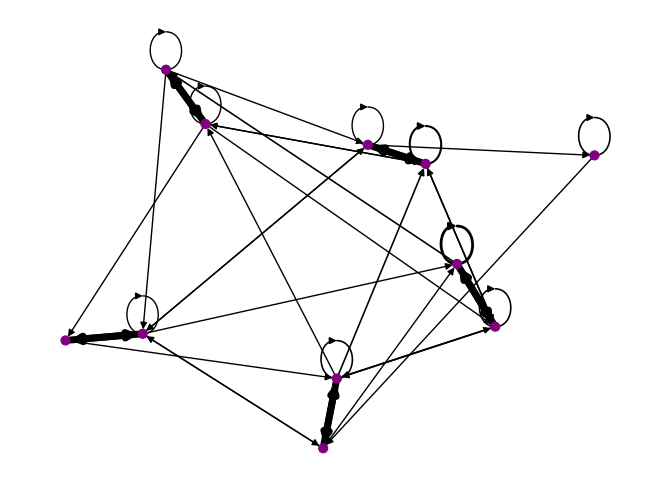

In [6]:
multivariate_timegraph_ordinal_partition = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
         .with_preprocessing(TimeseriesPreprocessingSegmentation(100, 130)))\
    .to_graph(BuildTimeseriesToGraphOrdinalPartition(3, 2).get_strategy())\
    .link(LinkGraphs().time_cooccurrence())\
    .draw("purple")